In [ ]:
from glob import glob
import cv2
import numpy as np
import matplotlib.pylab as plt
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


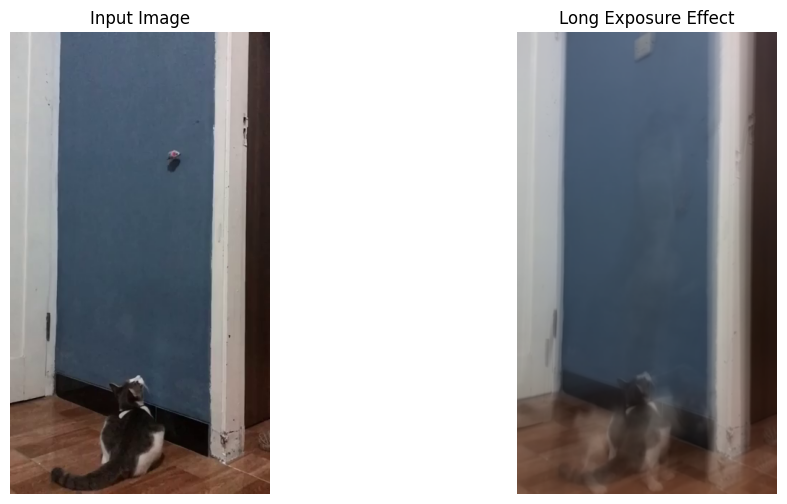

In [ ]:
def extract_frames(vid_file, output_folder='images/exposure/', max_frames=200):
    os.makedirs(output_folder, exist_ok=True)
    vidcap = cv2.VideoCapture(vid_file)
    success, image = vidcap.read()
    count = 1

    if success:
        input_frame = image.copy()  # Simpan frame pertama sebagai gambar input

    while success and count <= max_frames:
        frame_path = os.path.join(output_folder, f'vid_{count}.jpg')
        cv2.imwrite(frame_path, image)
        success, image = vidcap.read()
        count += 1
    vidcap.release()
    return input_frame

# Ekstrak frame dari video
video_path = '/content/drive/MyDrive/images/kucing.mp4'  # Pastikan path ini benar
input_image = extract_frames(video_path)

# Mengambil semua frame yang diekstrak
imfiles = glob('images/exposure/*.jpg')
nfiles = len(imfiles)

# Inisialisasi array untuk menampung akumulasi warna
R1, G1, B1 = 0, 0, 0

# Akumulasi semua frame
for i in range(nfiles):
    image = cv2.imread(imfiles[i]).astype(float)
    B, G, R = cv2.split(image)
    R1 += R
    G1 += G
    B1 += B

# Rata-rata warna di semua frame
R1 /= nfiles
G1 /= nfiles
B1 /= nfiles

# Gabungkan kembali channel warna
final = cv2.merge([B1, G1, R1])

# Simpan hasil akhir
output_path = '/content/drive/MyDrive/images/kucing.jpg'
cv2.imwrite(output_path, final)

# Tampilkan hasil
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Tampilkan gambar input
input_display = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
axes[0].imshow(input_display)
axes[0].axis('off')
axes[0].set_title('Input Image')

# Tampilkan gambar output
final_display = cv2.cvtColor(final.astype(np.uint8), cv2.COLOR_BGR2RGB)
axes[1].imshow(final_display)
axes[1].axis('off')
axes[1].set_title('Long Exposure Effect')

plt.show()